In [1]:
!git clone https://github.com/lekshmi-j/automatic-text-summarization.git



Cloning into 'automatic-text-summarization'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 37 (delta 12), reused 21 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 67.56 KiB | 1.38 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
%cd automatic-text-summarization

/content/automatic-text-summarization


**Goal:**

Rank sentences using their **similarity to other sentences**.

Instead of “important words”, we now use:

“Important sentences are those similar to many other sentences”

**TF-IDF:**

Looks at words

**TextRank:**

Looks at **relationships between sentences**

This captures global meaning of the document.

In [4]:
import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("punkt_tab")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
#unsupervised graph-based summarization.
from datasets import load_dataset
from src.preprocess import preprocess_article
from src.extractive import build_similarity_matrix, textrank_scores, get_top_sentences

dataset = load_dataset("cnn_dailymail", "3.0.0")
article = dataset["train"][5]["article"]

original, cleaned = preprocess_article(article)

sim_matrix = build_similarity_matrix(cleaned)
scores = textrank_scores(sim_matrix)

summary = get_top_sentences(original, scores, k=5)

print(summary)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

3.0.0/train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

3.0.0/train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

3.0.0/train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

3.0.0/validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

3.0.0/test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

BAGHDAD, Iraq (CNN) -- Dressed in a Superman shirt, 5-year-old Youssif held his sister's hand Friday, seemingly unaware that millions of people across the world have been touched by his story. The family eventually told CNN their story -- that Youssif was grabbed by masked men outside their home on January 15, doused in gasoline and set on fire. Shortly after Youssif's story aired Wednesday, the Children's Burn Foundation -- a nonprofit organization based in Sherman Oaks, California, that provides support for burn victims locally, nationally and internationally -- agreed to pay for the transportation for Youssif and his family to come to the United States and to set up a fund for donations. "We are prepared to have them come here, set them up in a housing situation, provide support for them and begin treatment," said Barbara Friedman, executive director of the Children's Burn Foundation. But he didn't want to; his mother says he's shy outside of their home.


A sentence is important if:

It is similar to many other sentences

Those sentences are also important

This captures:

**Topic centrality**

**Redundancy**

Global document meaning

Exactly what summaries need.

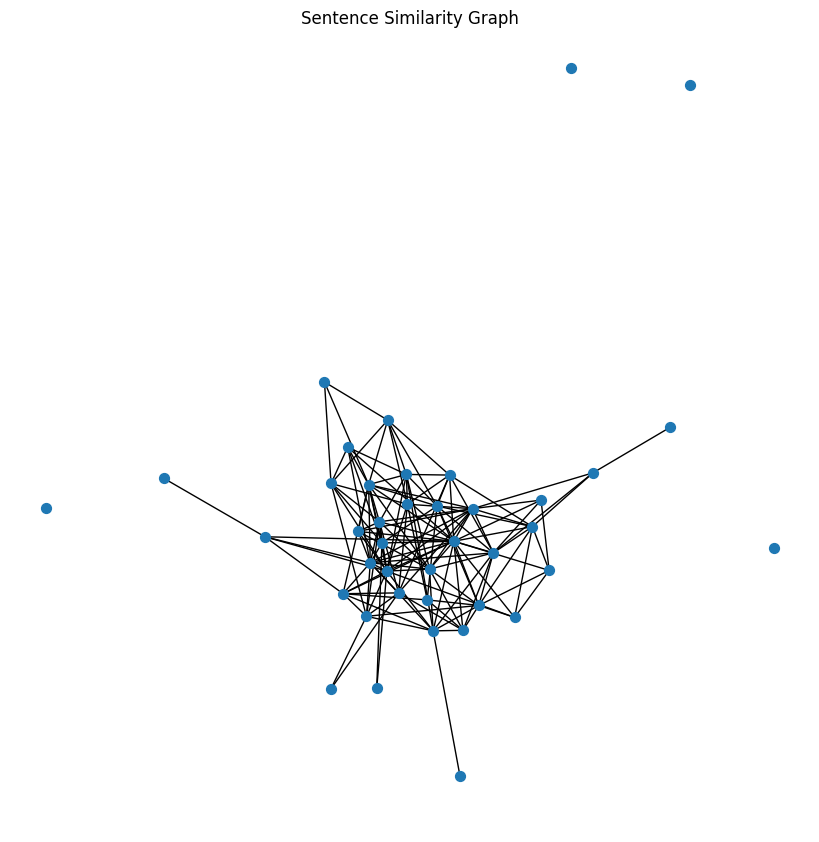

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_numpy_array(sim_matrix)

plt.figure(figsize=(8,8))
nx.draw(G, node_size=50)
plt.title("Sentence Similarity Graph")
plt.show()
